In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y.ravel(), cmap=cmap, lw=0)

    return fig, ax

In [ ]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, input_dim=2, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-1))

In [ ]:
# This builds the model for the first time:
model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
2/2 [==============================] - 0s 6ms/step - loss: 0.3485
Epoch 2/10
2/2 [==============================] - 0s 7ms/step - loss: 0.2824
Epoch 3/10
2/2 [==============================] - 0s 10ms/step - loss: 0.2431
Epoch 4/10
2/2 [==============================] - 0s 5ms/step - loss: 0.2160
Epoch 5/10
2/2 [==============================] - 0s 4ms/step - loss: 0.1940
Epoch 6/10
2/2 [==============================] - 0s 7ms/step - loss: 0.1779
Epoch 7/10
2/2 [==============================] - 0s 7ms/step - loss: 0.1681
Epoch 8/10
2/2 [==============================] - 0s 5ms/step - loss: 0.1637
Epoch 9/10
2/2 [==============================] - 0s 5ms/step - loss: 0.1505
Epoch 10/10
2/2 [==============================] - 0s 5ms/step - loss: 0.1717


In [ ]:
results = model.evaluate(X_test, y_test, batch_size=32)
print("test loss, test acc:", results)

2/2 [==============================] - 0s 6ms/step - loss: 0.3431
test loss, test acc: 0.34313690662384033


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f94a37e72d0>)

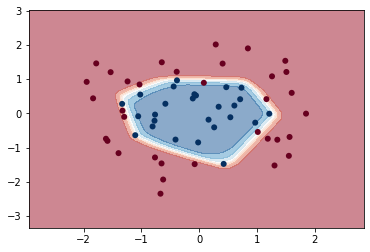

In [ ]:
plot_decision_boundary(X_train, y_train, model, cmap = 'RdBu')

In [ ]:
model_low = tf.keras.Sequential()
model_low.add(tf.keras.layers.Dense(2, input_dim=2, activation="relu"))
model_low.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_low.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-1))
model_low.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
2/2 [==============================] - 0s 6ms/step - loss: 0.7254
Epoch 2/10
2/2 [==============================] - 0s 6ms/step - loss: 0.6846
Epoch 3/10
2/2 [==============================] - 0s 5ms/step - loss: 0.6837
Epoch 4/10
2/2 [==============================] - 0s 7ms/step - loss: 0.6818
Epoch 5/10
2/2 [==============================] - 0s 5ms/step - loss: 0.6758
Epoch 6/10
2/2 [==============================] - 0s 7ms/step - loss: 0.6660
Epoch 7/10
2/2 [==============================] - 0s 7ms/step - loss: 0.6592
Epoch 8/10
2/2 [==============================] - 0s 10ms/step - loss: 0.6472
Epoch 9/10
2/2 [==============================] - 0s 6ms/step - loss: 0.6373
Epoch 10/10
2/2 [==============================] - 0s 5ms/step - loss: 0.6333


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f949cedd110>)

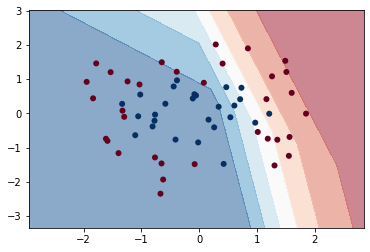

In [ ]:
plot_decision_boundary(X_train, y_train, model_low, cmap = 'RdBu')

In [ ]:
results = model_low.evaluate(X_test, y_test, batch_size=32)
print("test loss, test acc:", results)

2/2 [==============================] - 0s 5ms/step - loss: 0.7230
test loss, test acc: 0.7230116128921509
